In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')


titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Identify missing values

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# missing columns
# Age
# Cabin
# Embarked

Handle Missing Values

In [ ]:
titanic['age'].fillna(titanic['age'].mean(), inplace=True)


/tmp/ipython-input-948906033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace=True)


In [ ]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


/tmp/ipython-input-367046106.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


In [ ]:
titanic.drop('deck', axis=1, inplace=True)


In [ ]:
titanic.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


Detect and Handle Outliers (Age, Fare)

(a) Boxplot visualization

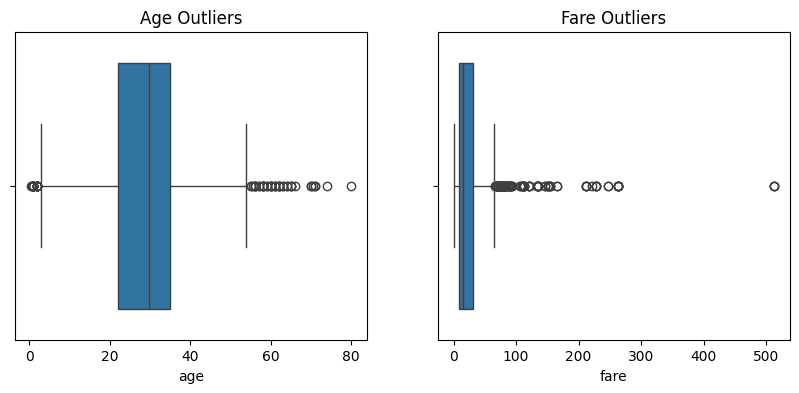

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(x=titanic['age'])
plt.title("Age Outliers")

plt.subplot(1,2,2)
sns.boxplot(x=titanic['fare'])
plt.title("Fare Outliers")

plt.show()


(b) Find outliers using IQR

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

outliers_fare = detect_outliers(titanic, 'fare')
outliers_fare.shape


(116, 14)

(c) Handle outliers

In [ ]:
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

titanic['fare'] = np.where(titanic['fare'] > upper, upper,
                           np.where(titanic['fare'] < lower, lower, titanic['fare']))


Normalize Numerical Columns

(a) Min-Max Normalization (Fare)

In [ ]:
titanic['fare_minmax'] = (titanic['fare'] - titanic['fare'].min()) / (titanic['fare'].max() - titanic['fare'].min())


(b) Z-Score Normalization (Age)

In [ ]:
titanic['age_zscore'] = (titanic['age'] - titanic['age'].mean()) / titanic['age'].std()


Verify Changes

In [ ]:
titanic[['fare', 'fare_minmax', 'age', 'age_zscore']].head()


,fare,fare_minmax,age,age_zscore
0,7.2500,0.110460,22.0,-0.592148
1,65.6344,1.000000,38.0,0.638430
2,7.9250,0.120745,26.0,-0.284503
3,53.1000,0.809027,35.0,0.407697
4,8.0500,0.122649,35.0,0.407697


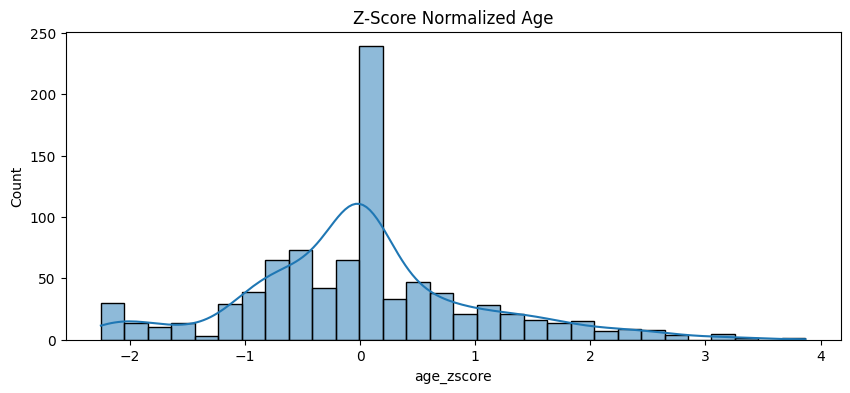

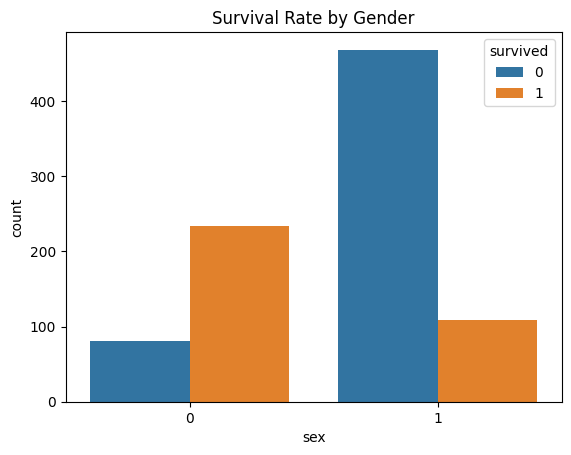

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(titanic['age_zscore'], kde=True)
plt.title("Z-Score Normalized Age")
plt.show()

# Survival Rate by Gender
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title("Survival Rate by Gender")
plt.show()

In [ ]:
print("Missing Values:\n", titanic.isnull().sum())
print("\nData Types:\n", titanic.dtypes)
print("\nPreview:\n", titanic.head())


Missing Values:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
fare_minmax    0
age_zscore     0
dtype: int64

Data Types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
fare_minmax     float64
age_zscore      float64
dtype: object

Preview:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  65.6344        C  First   
2         1       3  female  26.0      0      0

Part 2: Feature Engineering

Step 1: Create a New Feature — is_child

In [ ]:
# Create binary column 'is_child'
titanic['is_child'] = np.where(titanic['age'] < 16, 1, 0)

titanic[['age', 'is_child']].head(10)


,age,is_child
0,22.000000,0
1,38.000000,0
2,26.000000,0
3,35.000000,0
4,35.000000,0
5,29.699118,0
6,54.000000,0
7,2.000000,1
8,27.000000,0
9,14.000000,1


Step 2: Encode Categorical Variables

(a) Encode sex column → binary (Male = 1, Female = 0)

In [ ]:
titanic['sex'] = titanic['sex'].map({'male': 1, 'female': 0})


(b) Encode embarked using dummy variables

In [ ]:
titanic['embarked'] = titanic['embarked'].fillna('UNKNOWN')

# Create dummy variables for 'embarked'
embarked_dummies = pd.get_dummies(titanic['embarked'], prefix='embarked')

# Concatenate with main dataset
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# Check results
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_minmax,age_zscore,is_child,embarked_C,embarked_Q,embarked_S
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,0.110460,-0.592148,0,False,False,True
1,1,1,0,38.0,1,0,65.6344,C,First,woman,False,Cherbourg,yes,False,1.000000,0.638430,0,True,False,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0.120745,-0.284503,0,False,False,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0.809027,0.407697,0,False,False,True
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0.122649,0.407697,0,False,False,True


In [ ]:
final_features = ['survived', 'pclass', 'sex', 'age', 'fare', 'is_child'] + list(embarked_dummies.columns)
titanic_final = titanic[final_features]

Step 3: Down-Sample (Select Relevant Features)

In [ ]:
final_features = ['survived', 'pclass', 'sex', 'age', 'fare', 'is_child'] + list(embarked_dummies.columns)
titanic_final = titanic[final_features]


Step 4: Inspect the Final Dataset

In [ ]:
display(titanic_final.head())

,survived,pclass,sex,age,fare,is_child,embarked_C,embarked_Q,embarked_S
0,0,3,1,22.0,7.2500,0,False,False,True
1,1,1,0,38.0,65.6344,0,True,False,False
2,1,3,0,26.0,7.9250,0,False,False,True
3,1,1,0,35.0,53.1000,0,False,False,True
4,0,3,1,35.0,8.0500,0,False,False,True


In [ ]:
titanic_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   fare        891 non-null    float64
 5   is_child    891 non-null    int64  
 6   embarked_C  891 non-null    bool   
 7   embarked_Q  891 non-null    bool   
 8   embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


Part 3: Deliverables

Step 1: Save the Cleaned Dataset

In [ ]:
# Save final cleaned dataset
titanic_final.to_csv('titanic_clean.csv', index=False)


Step 2: Create observations.md

1. Missing Values Handled

Column	Missing Values	Method Used
Age	Yes	Replaced with mean value
Embarked	Yes	Replaced with mode (most frequent) value
Cabin	Yes	Dropped (too many missing values)


2. Outliers

Column	Action Taken	Notes
Age	Retained	Outliers were minimal
Fare	Capped	Extreme values replaced using IQR upper/lower limits


3. Normalization Applied

Column	Technique	Formula
Fare	Min–Max Normalization	(X - X_min) / (X_max - X_min)
Age	Z-score Normalization	(X - μ) / σ

4. Feature Engineering

Created is_child: 1 if Age < 16, else 0

Encoded sex: Male = 1, Female = 0

Encoded embarked using one-hot encoding (embarked_C, embarked_Q, embarked_S, embarked_UNKNOWN)

5. Down-sampled Final Features

In [ ]:
['survived', 'pclass', 'sex', 'age', 'fare', 'is_child',
 'embarked_C', 'embarked_Q', 'embarked_S', 'embarked_UNKNOWN']


['survived',
 'pclass',
 'sex',
 'age',
 'fare',
 'is_child',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'embarked_UNKNOWN']

6. Final Dataset Shape

In [ ]:
print(f"Rows: {titanic_final.shape[0]}")
print(f"Columns: {titanic_final.shape[1]}")

Rows: 891
Columns: 9


In [ ]:
titanic_final.shape


(891, 9)

7. Tools Used

Python

Pandas

NumPy

Matplotlib / Seaborn